In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from uncertainties import ufloat


In [2]:
filenames = ['df_t0_ratio.csv','df_t0_ratio_repeat.csv', 'df_t30_ratio.csv',
             'df_t60_ratio.csv','df_t90_ratio.csv', 'df_t120_ratio.csv']
# Create list of filenames to be read

dataframes = [pd.read_csv(file) for file in filenames]
# Use list comprehension to generate list of read dataframes

df_mean = dataframes[0][['Condition', 'Mean Ratio']]
# Create the an initial dataframe by taking the slug identity and and '0' columns of the t0 data.


for file in dataframes[1:]:
        df_mean = pd.concat([df_mean, file['Mean Ratio']],
                       axis=1, ignore_index=True)
# Concatenate subsequent dataframe's 'Averaged Vinyl Divide Aromatic' column along the columns axis and ignore the index.
        
col_names = {0:'Condition',
            1:'t0_mean',
            2:'t0_mean_repeat', 
            3:'t30_mean',
            4:'t60_mean',
            5:'t90_mean',
            6:'t120_mean'}
df_mean.rename(columns=col_names, inplace=True)
# Rename columns

df_mean
# Check df_mean

,Condition,t0_mean,t0_mean_repeat,t30_mean,t60_mean,t90_mean,t120_mean
0,10,2.866123,3.257155,2.428059,2.225985,2.502577,2.157280
1,11,3.420680,3.646152,2.998519,2.546268,2.332383,2.310308
2,12,3.489807,3.562789,2.974378,2.470561,2.209005,2.260401
3,13,4.878867,5.192406,4.225433,3.536575,3.379324,3.437051
4,14,5.481312,5.714982,4.691664,3.852193,3.449944,3.444537
5,15,5.502231,5.718756,4.600685,3.743014,3.342917,3.199915
6,16,8.602723,9.511260,6.917518,5.785208,4.999600,4.994108
7,17,9.549913,9.798753,7.665291,6.386851,5.831321,5.631145
8,18,9.604202,10.126208,7.744347,6.257026,5.724859,5.443330


In [3]:
df_std = dataframes[0][['Condition', 'Standard Deviation']]

for file in dataframes[1:]:
        df_std = pd.concat([df_std, file['Standard Deviation']], axis=1, ignore_index=True)
        
col_names = {0:'Condition',
            1:'t0_std',
            2:'t0_std_repeat', 
            3:'t30_std',
            4:'t60_std',
            5:'t90_std',
            6:'t120_std'}
df_std.rename(columns=col_names, inplace=True)
# Rename columns

df_std
# Check df_std

,Condition,t0_std,t0_std_repeat,t30_std,t60_std,t90_std,t120_std
0,10,0.068647,0.052241,0.083745,0.057926,0.094708,0.059813
1,11,0.044137,0.020661,0.033856,0.076492,0.048235,0.042484
2,12,0.064808,0.046619,0.025496,0.081814,0.056146,0.048678
3,13,0.058345,0.081221,0.186672,0.065316,0.067192,0.066523
4,14,0.074288,0.080119,0.106128,0.088351,0.092713,0.102710
5,15,0.074161,0.115301,0.089332,0.120599,0.126230,0.084124
6,16,0.119861,0.555119,0.122508,0.293716,0.155505,0.164897
7,17,0.139019,0.310016,0.250480,0.282318,0.219528,0.283945
8,18,0.271683,0.216173,0.127484,0.216544,0.216675,0.217869


In [4]:
# Express the Mean and Std of the Ratios and append them in a list.
l_t0=[]
for i in range(0,9):
    l_t0.append(ufloat(df_mean.loc[i, 't0_mean'], df_std.loc[i, 't0_std']))
    
l_t0_repeat=[]
for i in range(0,9):
    l_t0_repeat.append(ufloat(df_mean.loc[i, 't0_mean_repeat'], df_std.loc[i, 't0_std_repeat']))

l_t30=[]
for i in range(0,9):
    l_t30.append(ufloat(df_mean.loc[i, 't30_mean'], df_std.loc[i, 't30_std']))

l_t60=[]
for i in range(0,9):
    l_t60.append(ufloat(df_mean.loc[i, 't60_mean'], df_std.loc[i, 't60_std']))

l_t90=[]
for i in range(0,9):
    l_t90.append(ufloat(df_mean.loc[i, 't90_mean'], df_std.loc[i, 't90_std']))

l_t120=[]
for i in range(0,9):
    l_t120.append(ufloat(df_mean.loc[i, 't120_mean'], df_std.loc[i, 't120_std']))
    
df_ufloat = pd.DataFrame([l_t0, l_t0_repeat, l_t30, l_t60, l_t90, l_t120]).T
df_ufloat.insert(loc=0, column = 'Condition', value = df_mean.Condition.values)
df_ufloat.rename({1: '0_repeat', 2:30, 3:60, 4:90, 5:120}, inplace=True, axis=1)
df_ufloat

,Condition,0,0_repeat,30,60,90,120
0,10,2.87+/-0.07,3.26+/-0.05,2.43+/-0.08,2.23+/-0.06,2.50+/-0.09,2.16+/-0.06
1,11,3.42+/-0.04,3.646+/-0.021,2.999+/-0.034,2.55+/-0.08,2.33+/-0.05,2.31+/-0.04
2,12,3.49+/-0.06,3.56+/-0.05,2.974+/-0.025,2.47+/-0.08,2.21+/-0.06,2.26+/-0.05
3,13,4.88+/-0.06,5.19+/-0.08,4.23+/-0.19,3.54+/-0.07,3.38+/-0.07,3.44+/-0.07
4,14,5.48+/-0.07,5.71+/-0.08,4.69+/-0.11,3.85+/-0.09,3.45+/-0.09,3.44+/-0.10
5,15,5.50+/-0.07,5.72+/-0.12,4.60+/-0.09,3.74+/-0.12,3.34+/-0.13,3.20+/-0.08
6,16,8.60+/-0.12,9.5+/-0.6,6.92+/-0.12,5.79+/-0.29,5.00+/-0.16,4.99+/-0.16
7,17,9.55+/-0.14,9.80+/-0.31,7.67+/-0.25,6.39+/-0.28,5.83+/-0.22,5.63+/-0.28
8,18,9.60+/-0.27,10.13+/-0.22,7.74+/-0.13,6.26+/-0.22,5.72+/-0.22,5.44+/-0.22


In [5]:
# Create Conversion and Propagated Standard Deviation DataFrame

df_conversion = pd.DataFrame()
df_conversion = pd.concat([df_conversion, df_mean['Condition']], axis=1)

df_conversion[0] = ((1 - (df_mean.iloc[:,1]/ df_mean.iloc[:,1]))*100)

df_conversion[30] = ((1 - (df_mean.iloc[:,3]/ df_mean.iloc[:,1]))*100)

df_conversion[60] = ((1 - (df_mean.iloc[:,4]/ df_mean.iloc[:,1]))*100)

df_conversion[90] = ((1 - (df_mean.iloc[:,5]/ df_mean.iloc[:,2]))*100)

df_conversion[120] = ((1 - (df_mean.iloc[:,6]/ df_mean.iloc[:,2]))*100)

df_conversion

,Condition,0,30,60,90,120
0,10,0.0,15.284207,22.334634,23.166777,33.767964
1,11,0.0,12.341438,25.562525,36.031671,36.637091
2,12,0.0,14.769565,29.206372,37.997856,36.555286
3,13,0.0,13.393156,27.512364,34.917955,33.806196
4,14,0.0,14.406181,29.721344,39.633331,39.727959
5,15,0.0,16.385091,31.972783,41.544678,44.045265
6,16,0.0,19.589204,32.751431,47.434940,47.492676
7,17,0.0,19.734445,33.121371,40.489152,42.532020
8,18,0.0,19.365017,34.851160,43.464927,46.245126


In [6]:
df_errorprop = pd.DataFrame()
df_errorprop = pd.concat([df_errorprop, df_ufloat['Condition']], axis=1)

df_errorprop[0] = ((1 - (df_ufloat.iloc[:,1]/ df_ufloat.iloc[:,1]))*100)

df_errorprop[30] = ((1 - (df_ufloat.iloc[:,3]/ df_ufloat.iloc[:,1]))*100)

df_errorprop[60] = ((1 - (df_ufloat.iloc[:,4]/ df_ufloat.iloc[:,1]))*100)

df_errorprop[90] = ((1 - (df_ufloat.iloc[:,5]/ df_ufloat.iloc[:,2]))*100)

df_errorprop[120] = ((1 - (df_ufloat.iloc[:,6]/ df_ufloat.iloc[:,2]))*100)

df_errorprop

,Condition,0,30,60,90,120
0,10,0.0+/-0,15+/-4,22.3+/-2.7,23.2+/-3.2,33.8+/-2.1
1,11,0.0+/-0,12.3+/-1.5,25.6+/-2.4,36.0+/-1.4,36.6+/-1.2
2,12,0.0+/-0,14.8+/-1.7,29.2+/-2.7,38.0+/-1.8,36.6+/-1.6
3,13,0.0+/-0,13+/-4,27.5+/-1.6,34.9+/-1.6,33.8+/-1.6
4,14,0.0+/-0,14.4+/-2.3,29.7+/-1.9,39.6+/-1.8,39.7+/-2.0
5,15,0.0+/-0,16.4+/-2.0,32.0+/-2.4,41.5+/-2.5,44.0+/-1.9
6,16,0.0+/-0,19.6+/-1.8,32.8+/-3.5,47.4+/-3.5,47.5+/-3.5
7,17,(0.0+/-2.5)e-16,19.7+/-2.9,33.1+/-3.1,40.5+/-2.9,42.5+/-3.4
8,18,0.0+/-0,19.4+/-2.6,34.9+/-2.9,43.5+/-2.5,46.2+/-2.4


In [7]:
error_list = []

for index, rows in df_errorprop.iterrows():
    l = rows.tolist()[1:]
    for element in l:
        error_list.append(element.std_dev)

error_dict = {'c1_error' : error_list[0:5],
            'c2_error' : error_list[5:10],
            'c3_error' : error_list[10:15],
            'c4_error' : error_list[15:20],
            'c5_error' : error_list[20:25],
            'c6_error' : error_list[25:30],
            'c7_error' : error_list[30:35],
            'c8_error' : error_list[35:40],
            'c9_error' : error_list[40:45]}

df_error = pd.DataFrame(error_dict).T
df_error.rename({1: 30, 2:60, 3:90, 4:120}, inplace=True, axis=1)
df_error.insert(loc=0, column = 'Condition', value = df_mean.Condition.values)
df_error

,Condition,0,30,60,90,120
c1_error,10,0.000000e+00,3.557298,2.746800,3.158058,2.121484
c2_error,11,0.000000e+00,1.502961,2.433716,1.371672,1.219243
c3_error,12,0.000000e+00,1.743256,2.687847,1.772477,1.598735
c4_error,13,0.000000e+00,3.963841,1.594905,1.646486,1.647262
c5_error,14,0.000000e+00,2.257094,1.872249,1.829752,1.985924
c6_error,15,0.000000e+00,1.976372,2.375868,2.502244,1.853812
c7_error,16,0.000000e+00,1.811943,3.540452,3.476383,3.520969
c8_error,17,2.469476e-16,2.871339,3.112421,2.926479,3.420949
c9_error,18,0.000000e+00,2.639104,2.912035,2.456651,2.438436


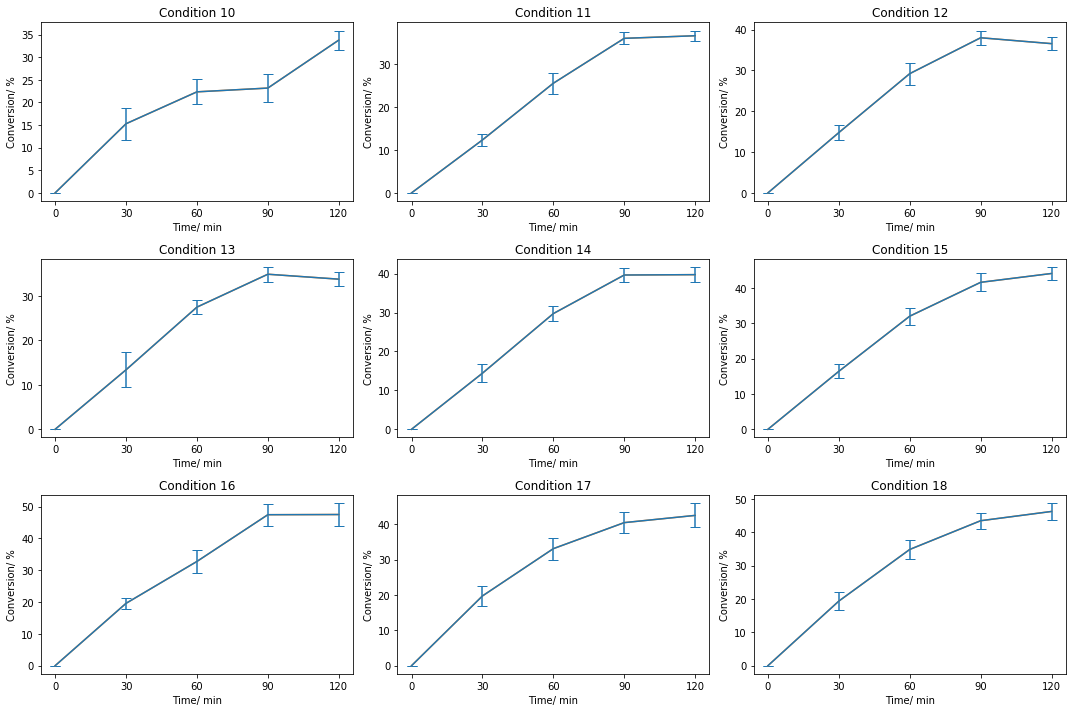

In [8]:
plt.figure(figsize=(15, 10))

for index, rows in df_conversion.iterrows():
    
    x = df_conversion.columns[1:] # Ignore Condition column during plotting
    
    y = rows[1:] # Ignore Condition column during plotting
    
    plt.subplot(3, 3, (1+index))
    
    plt.title('Condition ' + str(10+index))
    # np.round up to 1 d.p. for slug identity, then convert to string.
    
    plt.xlabel('Time/ min')

    plt.ylabel('Conversion/ %')
    
    plt.xticks([0,30,60,90,120]) # Set xticks to relevant time intervals.
    
    plt.errorbar(x, y, error_dict['c'+str(index+1)+'_error'], capsize = 5)
    
    plt.plot(x, y)
    
plt.tight_layout()
plt.show()

In [9]:
df_conversion.to_csv(r'C:\Users\Tan Jin Da\Desktop\High Throughput Experiments Data\201020 High Throughput Experiment Conditions 10 to 18\Online Raman\df_conversion.csv', index=False)

In [10]:
df_error.to_csv(r'C:\Users\Tan Jin Da\Desktop\High Throughput Experiments Data\201020 High Throughput Experiment Conditions 10 to 18\Online Raman\df_error.csv', index=False)